<a href="https://colab.research.google.com/github/avikumart/Healthcare-Data-Science/blob/main/Healthcare_lifestyle_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the dataset

In [1]:
# read the dataframe in R
data <- read.csv("/content/health_lifestyle_dataset.csv")

In [2]:
head(data)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
2,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
3,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
4,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
5,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
6,6,25,Male,27.3,19495,5.0,4.4,1301,0,1,73,107,65,284,0,0


## EDA

In [3]:
# print the missing values
print("missing values in dataset")
print(colSums(is.na(data)))

[1] "missing values in dataset"
               id               age            gender               bmi 
                0                 0                 0                 0 
      daily_steps       sleep_hours    water_intake_l calories_consumed 
                0                 0                 0                 0 
           smoker           alcohol        resting_hr       systolic_bp 
                0                 0                 0                 0 
     diastolic_bp       cholesterol    family_history      disease_risk 
                0                 0                 0                 0 


In [4]:
# print the summary stats
summary(data)

       id              age           gender               bmi       
 Min.   :     1   Min.   :18.00   Length:100000      Min.   :18.00  
 1st Qu.: 25001   1st Qu.:33.00   Class :character   1st Qu.:23.50  
 Median : 50000   Median :48.00   Mode  :character   Median :29.00  
 Mean   : 50000   Mean   :48.53                      Mean   :29.02  
 3rd Qu.: 75000   3rd Qu.:64.00                      3rd Qu.:34.50  
 Max.   :100000   Max.   :79.00                      Max.   :40.00  
  daily_steps     sleep_hours     water_intake_l  calories_consumed
 Min.   : 1000   Min.   : 3.000   Min.   :0.500   Min.   :1200     
 1st Qu.: 5729   1st Qu.: 4.700   1st Qu.:1.600   1st Qu.:1906     
 Median :10468   Median : 6.500   Median :2.800   Median :2603     
 Mean   :10480   Mean   : 6.492   Mean   :2.751   Mean   :2603     
 3rd Qu.:15229   3rd Qu.: 8.200   3rd Qu.:3.900   3rd Qu.:3299     
 Max.   :19999   Max.   :10.000   Max.   :5.000   Max.   :3999     
     smoker          alcohol      resting

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
library(ggplot2)

In [10]:
# function to plot the distributions
plot_distribution <- function(data, column) {
  p <- ggplot(data, aes_string(x = column)) +
    geom_histogram(aes(y = ..density..), fill = "skyblue", color = "black", bins = 30) +
    geom_density(color = "red", size = 1) +
    labs(title = paste("Distribution of", column), x = column, y = "Frequency") +
    theme_minimal()
  print(p)
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


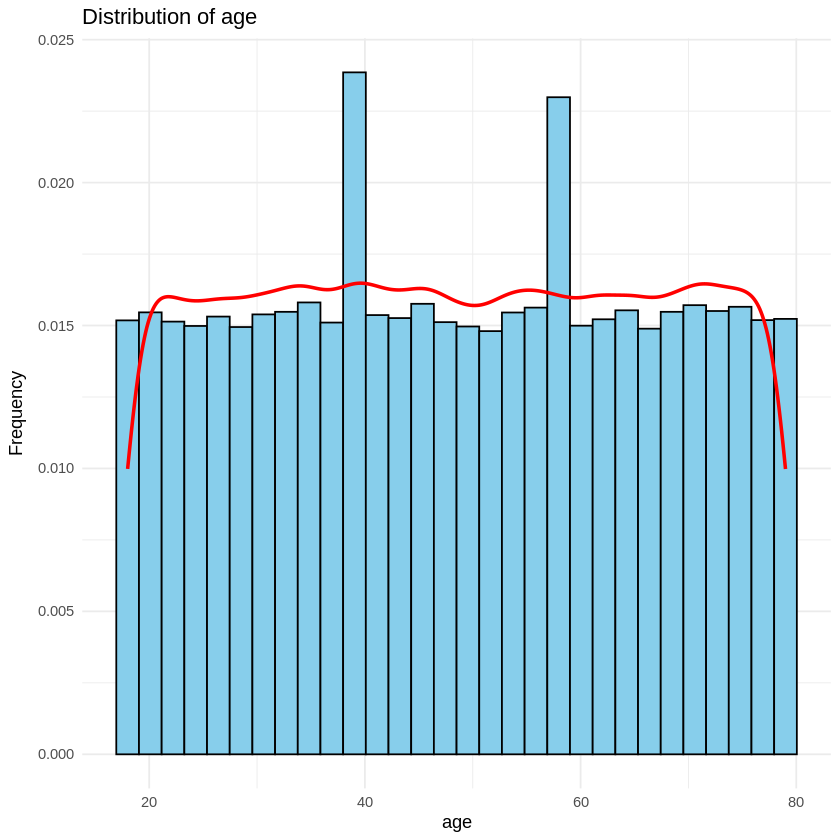

In [12]:
plot_distribution(data, "age")

In [18]:
# function to create the heatmap
plot_correlation_heatmap <- function(data) {
  nums <- unlist(lapply(data, is.numeric))
  numeric_data <- data[,nums]
  # calculate the correlation matrix
  corr_matrix <- cor(numeric_data, use = "complete.obs")
  # plot the correlation matrix
  corrplot(corr_matrix, method = "color", type= "upper",
         addCoef.col = "black", t1.col = "black", t1.srt = 45,
         title = "Correlation Heatmap", mar = c(0,0,1,0))
}

In [17]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.srt" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.srt" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.col" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.srt" is not a graphical parameter”


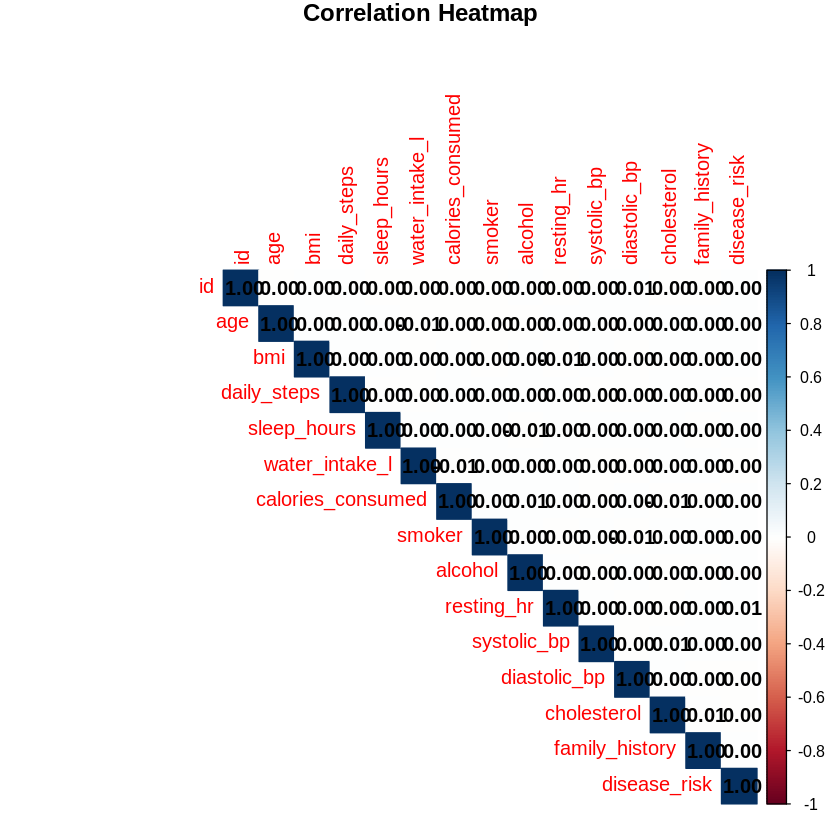

In [19]:
plot_correlation_heatmap(data)

In [20]:
# Function to plot boxplot
plot_boxplot <- function(data, column) {
  p <- ggplot(data, aes_string(y = column)) +
    geom_boxplot(fill = "lightgreen") +
    labs(title = paste("Boxplot of", column), y = column) +
    theme_minimal()
  print(p)
}

# Function to map relation of disease_risk with other columns
# Using stat_summary to mimic seaborn pointplot (mean with error bars)
plot_disease_risk_relation <- function(data, column) {
  p <- ggplot(data, aes_string(x = column, y = "disease_risk")) +
    stat_summary(fun.data = "mean_se", geom = "pointrange", color = "blue") +
    stat_summary(fun = "mean", geom = "line", group = 1, color = "blue") +
    labs(title = paste("Relation of", column, "with Disease Risk"),
         x = column, y = "Disease Risk (Mean)") +
    theme_minimal()
  print(p)
}

# Function to plot categorical count
plot_categorical_count <- function(data, column) {
  p <- ggplot(data, aes_string(x = column)) +
    geom_bar(fill = "orange", color = "black") +
    labs(title = paste("Count of", column), x = column, y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  print(p)
}

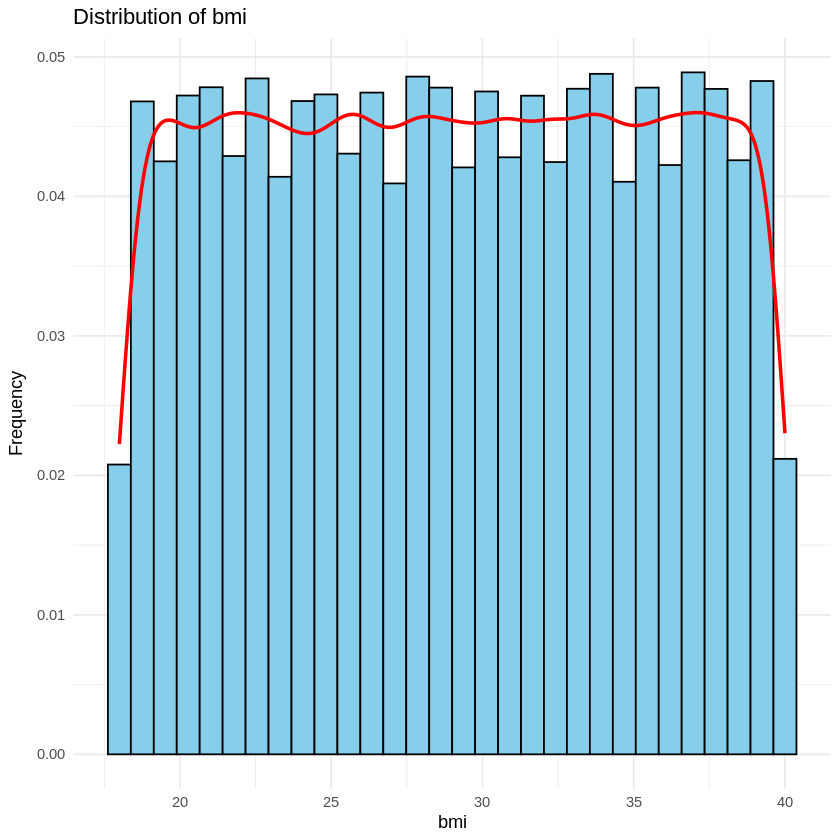

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"t1.srt" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.col" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"t1.srt" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.col" is not a graphical parameter”
Warning message in title(title, ...):
“"t1.srt" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"t1.col" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"t1.srt" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"t1.col" i

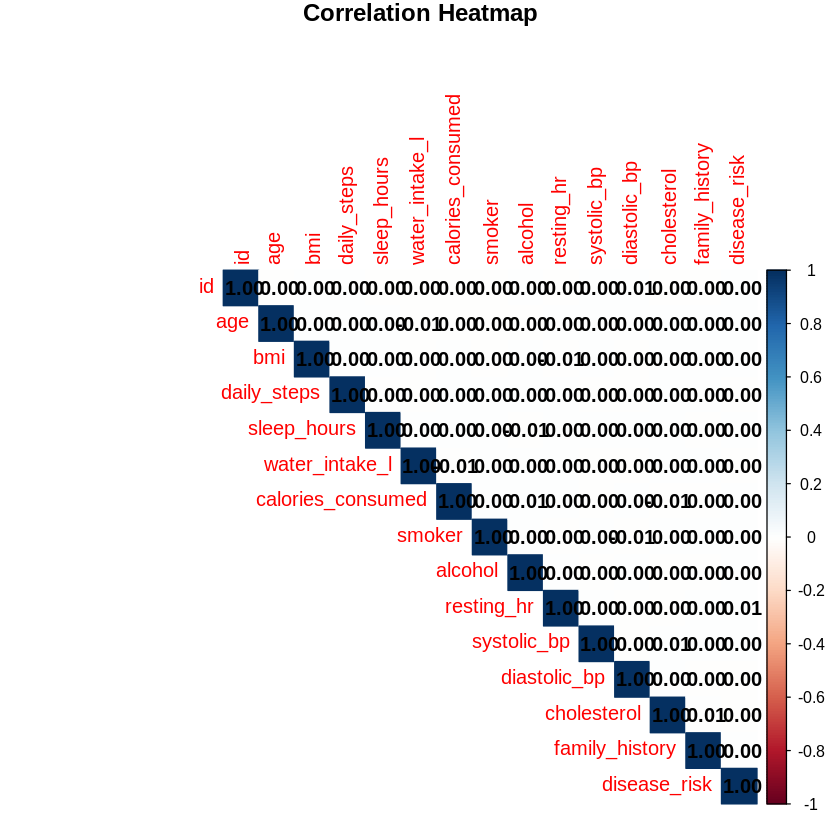

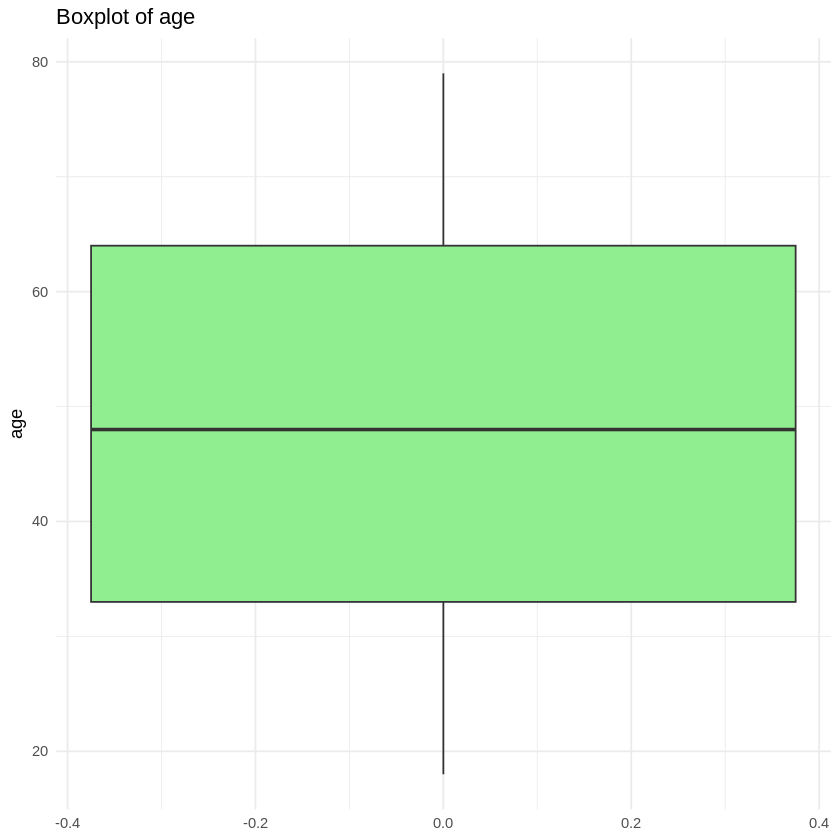

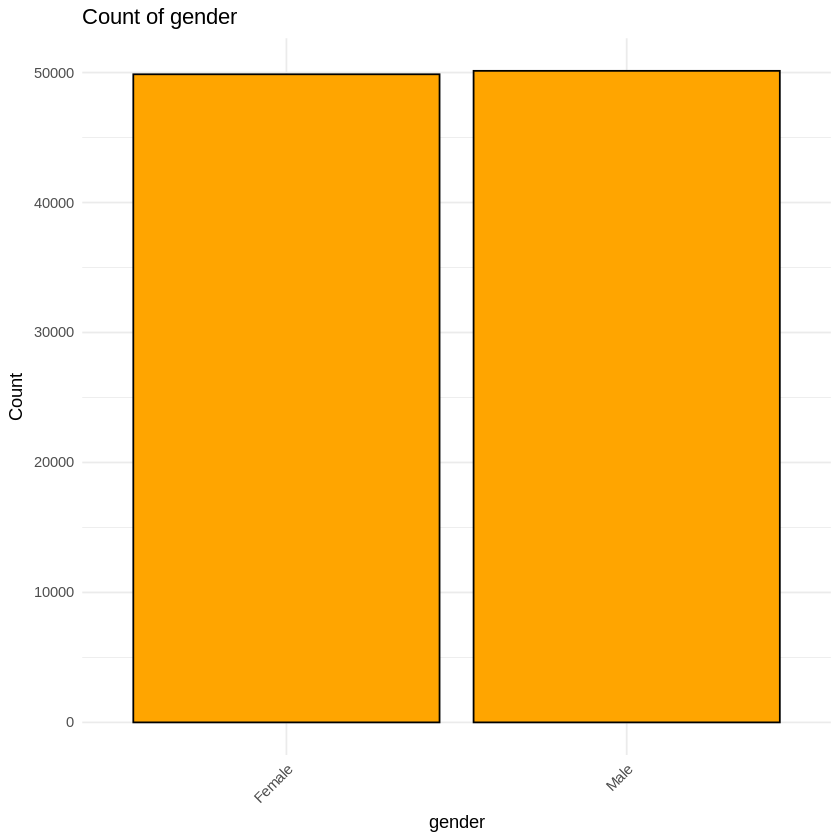

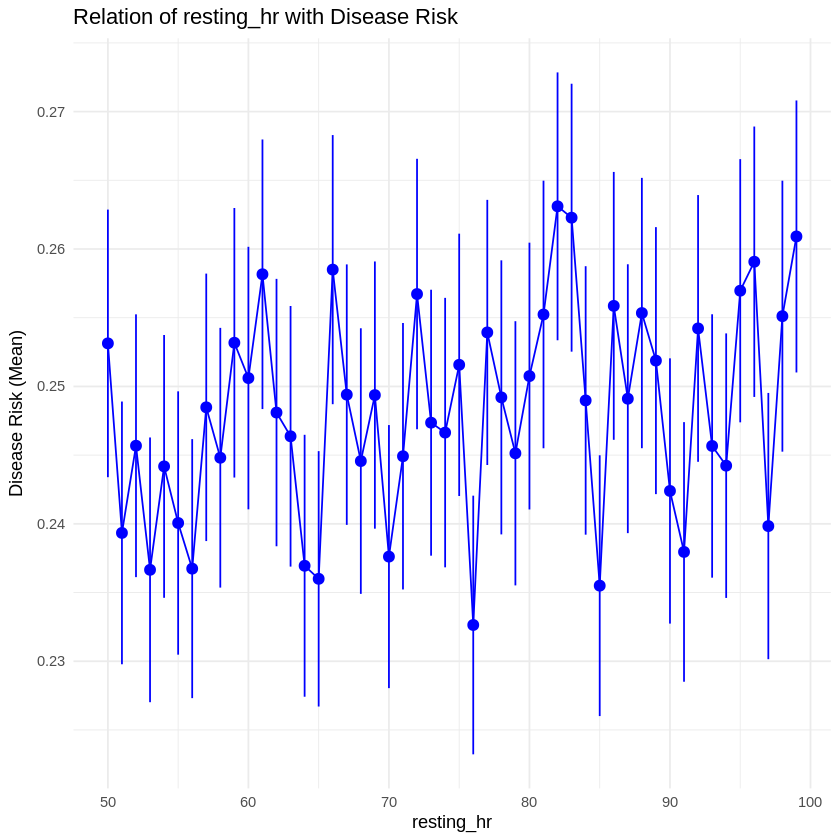

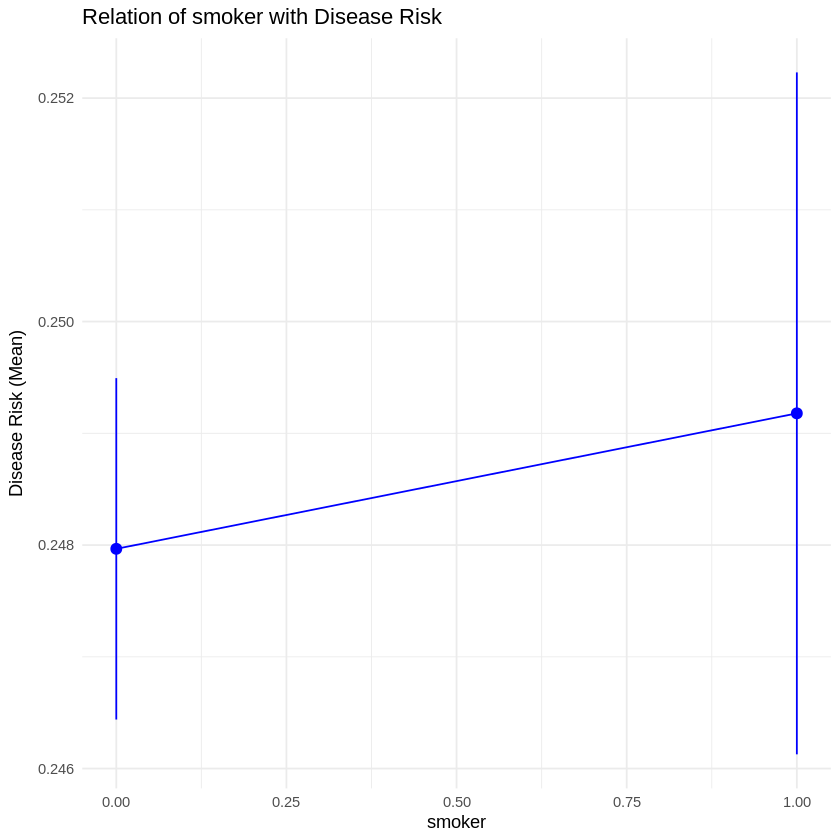

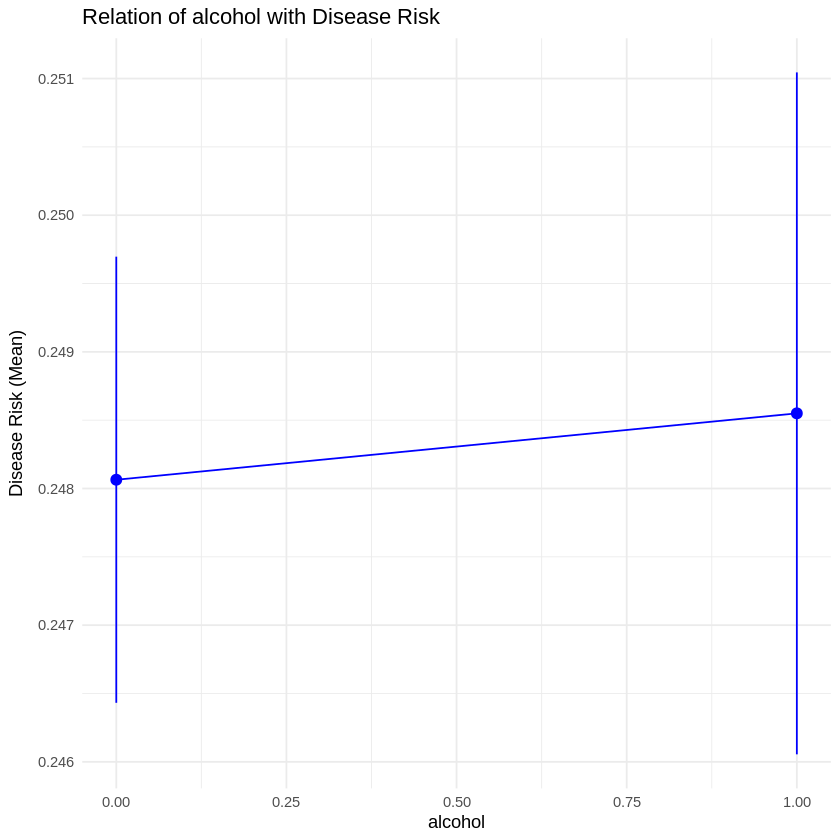

[1] "Target Variable Counts:"

    0     1 
75179 24821 


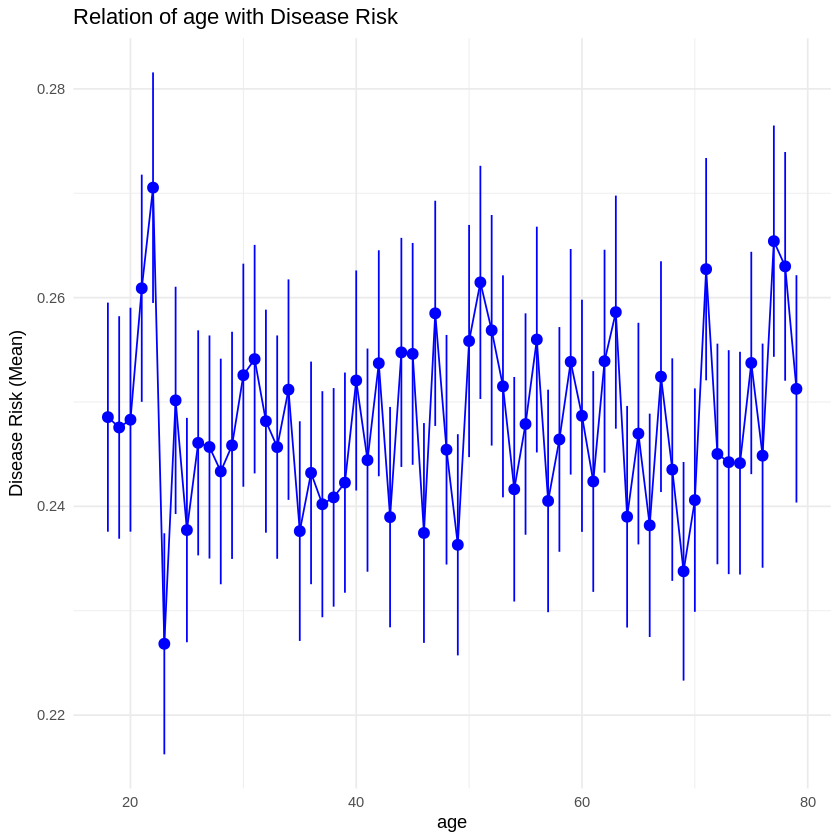

In [22]:
plot_distribution(data, 'bmi')
plot_correlation_heatmap(data)
plot_boxplot(data, 'age')
plot_categorical_count(data, 'gender')

# Relations
plot_disease_risk_relation(data, 'resting_hr')
plot_disease_risk_relation(data, 'smoker')
plot_disease_risk_relation(data, 'alcohol')
plot_disease_risk_relation(data, 'age')

  # Check Target Balance
print("Target Variable Counts:")
print(table(data$disease_risk))

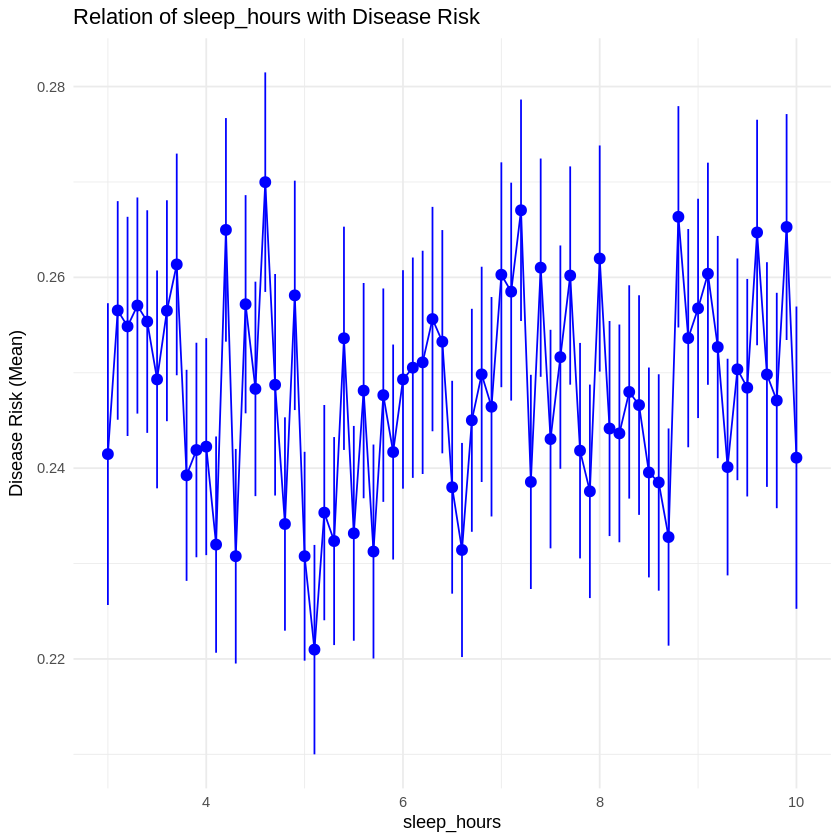

In [23]:
# other columns relations
plot_disease_risk_relation(data, "sleep_hours")

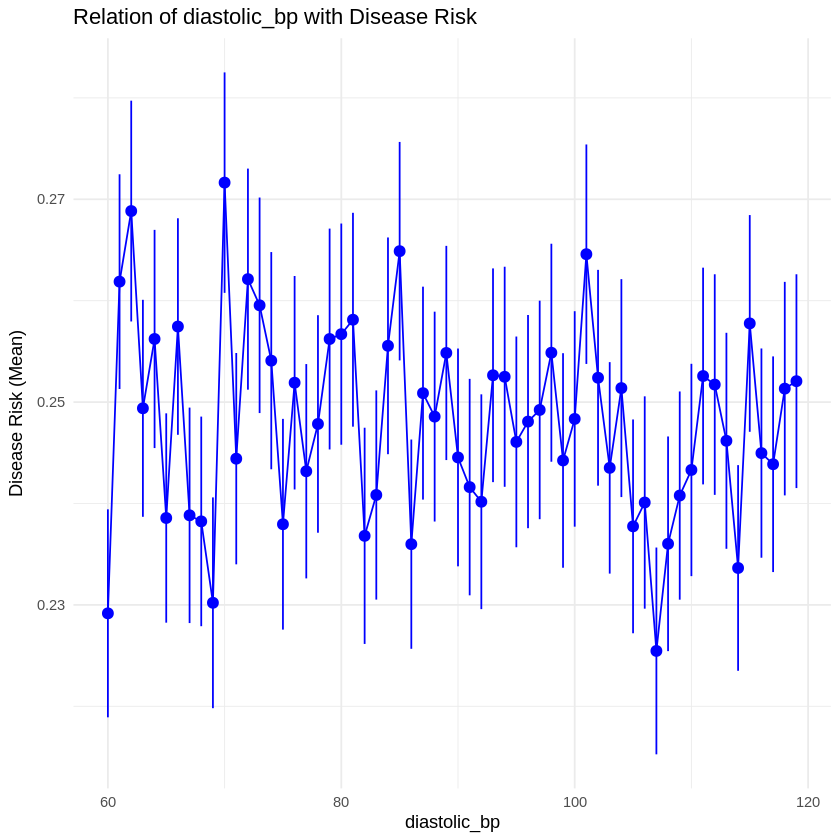

In [25]:
plot_disease_risk_relation(data, "diastolic_bp")

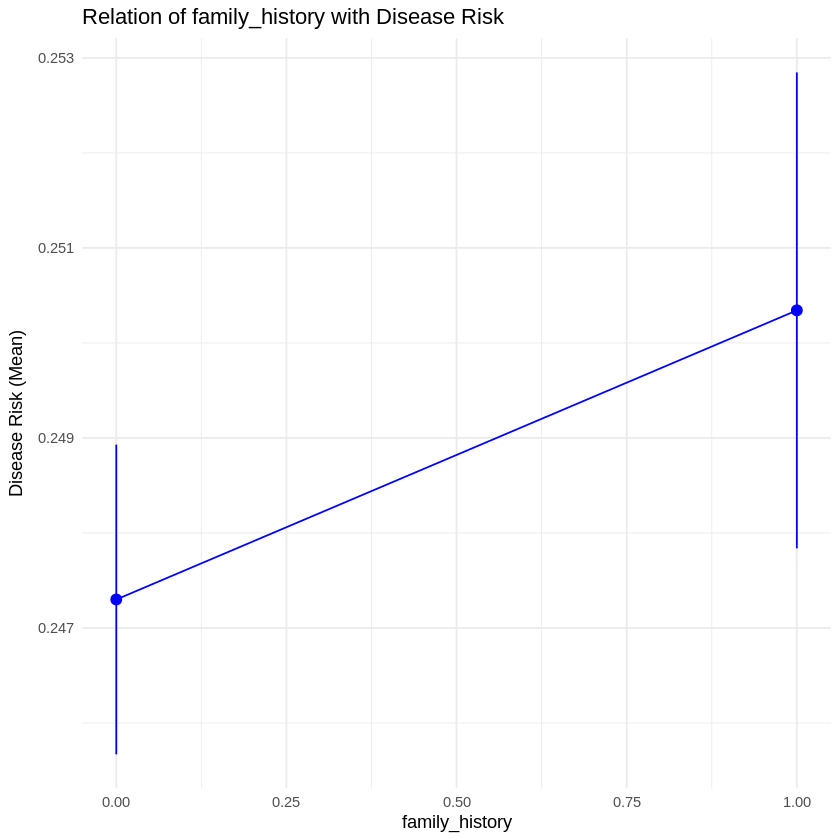

In [26]:
plot_disease_risk_relation(data, "family_history")

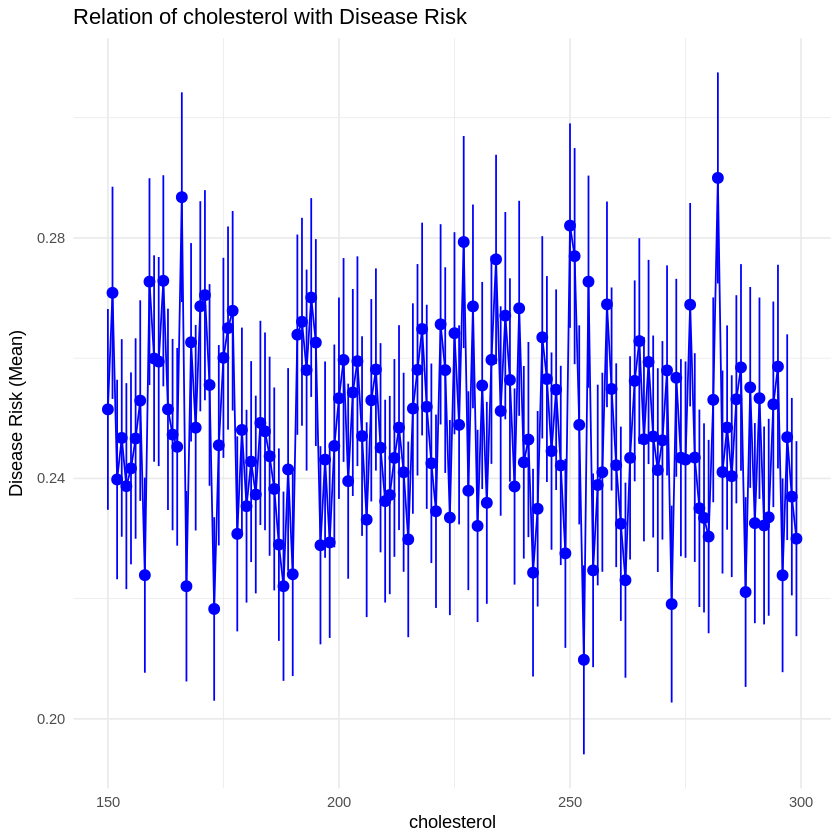

In [28]:
# cholesterol relation
plot_disease_risk_relation(data, "cholesterol")

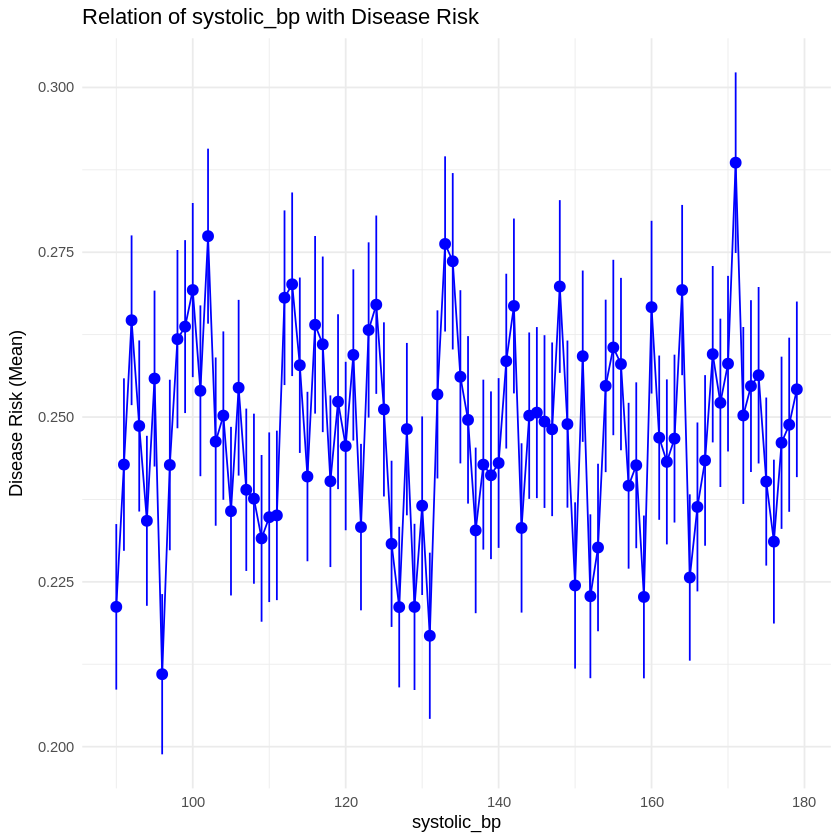

In [29]:
plot_disease_risk_relation(data, "systolic_bp")

## Machine Learning Pipeline

In [32]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘lava’, ‘listenv’, ‘prodlim’, ‘future’, ‘ipred’, ‘furrr’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’




In [33]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.10     ✔ rsample      1.3.1 
✔ dials        1.4.2      ✔ tailor       0.1.0 
✔ infer        1.0.9      ✔ tidyr        1.3.1 
✔ modeldata    1.5.1      ✔ tune         2.0.1 
✔ parsnip      1.4.0      ✔ workflows    1.3.0 
✔ purrr        1.2.0      ✔ workflowsets 1.1.1 
✔ recipes      1.3.1      ✔ yardstick    1.3.2 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



In [39]:
install.packages("themis")
library(themis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RANN’, ‘ROSE’




In [47]:
install.packages("ranger")
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [34]:
data$disease_risk <- as.factor(data$disease_risk)

set.seed(42)
split <- initial_split(data, prop = 0.8, strata = disease_risk)
train_data <- training(split)
test_data <- testing(split)

print(paste("training set size:", nrow(train_data)))
print(paste("test set size:", nrow(test_data)))

[1] "training set size: 79999"
[1] "test set size: 20001"


In [40]:
# feature engineering
ml_recipe <- recipe(disease_risk ~ ., data = train_data) %>%
    # Encode categorical variables (OneHotEncoder)
step_dummy(all_nominal_predictors()) %>%
    # Normalize numeric variables (StandardScaler)
step_normalize(all_numeric_predictors()) %>%
    # Apply SMOTE for class imbalance
step_smote(disease_risk, seed = 42)

In [41]:
# set up the log reg and random forest models
log_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Random Forest
rf_spec <- rand_forest(trees = 100) %>%
  set_engine("ranger", importance = "impurity") %>% # 'ranger' is a fast R implementation
  set_mode("classification")

In [48]:
print("Starting Model Training with SMOTE...")

set.seed(42)
folds <- vfold_cv(train_data, v = 5, strata = disease_risk)

  # 1. Logistic Regression Workflow
log_wf <- workflow() %>%
    add_recipe(ml_recipe) %>%
    add_model(log_spec)

log_res <- fit_resamples(
    log_wf,
    resamples = folds,
    metrics = metric_set(accuracy, recall, roc_auc),
    control = control_resamples(save_pred = TRUE)
  )

print("--- Logistic Regression CV Results ---")
print(collect_metrics(log_res) %>% select(.metric, mean))

  # 2. Random Forest Workflow
rf_wf <- workflow() %>%
    add_recipe(ml_recipe) %>%
    add_model(rf_spec)

rf_res <- fit_resamples(
    rf_wf,
    resamples = folds,
    metrics = metric_set(accuracy, recall, roc_auc)
  )

print("--- Random Forest CV Results ---")
print(collect_metrics(rf_res) %>% select(.metric, mean))

[1] "Starting Model Training with SMOTE..."
[1] "--- Logistic Regression CV Results ---"
# A tibble: 3 × 2
  .metric   mean
  <chr>    <dbl>
1 accuracy 0.503
2 recall   0.504
3 roc_auc  0.501
[1] "--- Random Forest CV Results ---"
# A tibble: 3 × 2
  .metric   mean
  <chr>    <dbl>
1 accuracy 0.703
2 recall   0.904
3 roc_auc  0.500


In [52]:
# testing of the models
evaluation_model <- function(workflow, name) {
  final_fit <- last_fit(workflow, split, metrics = metric_set(accuracy, recall, roc_auc))

    # Extract metrics
  metrics <- collect_metrics(final_fit)

  print(paste("--- Final Test Results:", name, "---"))
  print(metrics)

  return(final_fit)
}

In [53]:
log_final <- evaluation_model(log_wf, "Logistic Regression")
rf_final <- evaluation_model(rf_wf, "Random Forest")

# Feature Importance for Random Forest (Best Model analysis equivalent)
# Extract the fitted model object
fitted_rf <- extract_fit_parsnip(rf_final)

print("Variable Importance (Random Forest):")
# Using vip package if available, or extracting from ranger object
if (require("vip")) {
  print(vip::vip(fitted_rf))
  } else {
    print(fitted_rf$fit$variable.importance)
  }

  # Coefficients for Logistic Regression
fitted_log <- extract_fit_parsnip(log_final)
print("Coefficients (Logistic Regression):")
print(tidy(fitted_log))

[1] "--- Final Test Results: Logistic Regression ---"
# A tibble: 3 × 4
  .metric  .estimator .estimate .config        
  <chr>    <chr>          <dbl> <chr>          
1 accuracy binary         0.500 pre0_mod0_post0
2 recall   binary         0.500 pre0_mod0_post0
3 roc_auc  binary         0.498 pre0_mod0_post0
[1] "--- Final Test Results: Random Forest ---"
# A tibble: 3 × 4
  .metric  .estimator .estimate .config        
  <chr>    <chr>          <dbl> <chr>          
1 accuracy binary         0.709 pre0_mod0_post0
2 recall   binary         0.912 pre0_mod0_post0
3 roc_auc  binary         0.501 pre0_mod0_post0
[1] "Variable Importance (Random Forest):"


Loading required package: vip

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘vip’”


               id               age               bmi       daily_steps 
        3751.3684         4478.2802         3742.4697         3682.2701 
      sleep_hours    water_intake_l calories_consumed            smoker 
        4160.1286         6090.9888         3620.6832          367.1892 
          alcohol        resting_hr       systolic_bp      diastolic_bp 
         402.1484         5607.8072         4065.2719         4938.4238 
      cholesterol    family_history       gender_Male 
        3917.9126          407.4161          439.3971 
[1] "Coefficients (Logistic Regression):"
# A tibble: 16 × 5
   term               estimate std.error statistic p.value
   <chr>                 <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept)       -0.000231   0.00577   -0.0400 0.968  
 2 id                 0.00791    0.00590    1.34   0.180  
 3 age                0.00449    0.00588    0.763  0.446  
 4 bmi                0.0168     0.00589    2.85   0.00434
 5 daily_steps       -0.00987    0.00